In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                           accuracy_score, precision_recall_fscore_support, precision_score,
                           recall_score, f1_score, roc_curve, precision_recall_curve,
                           average_precision_score)
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

print("Libraries imported successfully!")


Libraries imported successfully!


In [23]:
import pandas as pd

#file_path = '/content/drive/My Drive/ML/mesa-sleep-dataset-0.7.0.csv'
file_path = 'C:\\Users\\Rashane\\GitHub\\Data\\mesa-sleep-dataset-0.7.0.csv'
mesa_df = pd.read_csv(file_path)

print(f"Dataset shape: {mesa_df.shape}")
print(f"Column names: {list(mesa_df.columns)}")
print(f"Total count: {mesa_df.shape[0]}")

# Check for missing values across key columns
print(f"\nMissing values summary:")
print(mesa_df.isnull().sum().sort_values(ascending=False).head(20))

Dataset shape: (2237, 623)
Column names: ['mesaid', 'examnumber', 'race1c', 'gender1', 'cucmcn1c', 'sleepage5c', 'site5c', 'htcm5', 'wtlb5', 'bmi5c', 'smkstat5', 'cursmk5', 'bedtmwkday5c', 'waketmwkday5c', 'wkdaysleepdur5c', 'wkdaysleepdur5t', 'bedtmwkend5c', 'waketmwkend5c', 'wkendsleepdur5c', 'wkendsleepdur5t', 'nap5', 'trbleslpng5', 'wakeup5', 'wakeearly5', 'bcksleep5', 'slpngpills5', 'irritable5', 'sleepy5', 'typicalslp5', 'readng5', 'tv5', 'sittng5', 'riding5', 'lyngdwn5', 'talkng5', 'quietly5', 'car5', 'dinner5', 'driving5', 'snored5', 'stpbrthng5', 'legsdscmfrt5', 'rubbnglgs5', 'wrserest5', 'wrseltr5', 'feelngbstr5', 'tired5', 'mosttired4', 'feelngbstpk5', 'types5', 'slpapnea5', 'cpap5', 'dntaldv5', 'uvula5', 'insmnia5', 'rstlesslgs5', 'wrksched5', 'extrahrs5', 'sleepqsid', 'whiirs5c', 'epslpscl5c', 'hoostmeq5c', 'havepsg5', 'haveact5', 'match5', 'stdypdy5c', 'status_psg5', 'rsnco5', 'scorerid5', 'inhomepsgyn5', 'e1dur5', 'e2dur5', 'chindur5', 'fzm1dur5', 'c4dur5', 'o2m1dur5', '

In [9]:
selected_features = [
    # Target variable
    'ahi_a0h3a',      # Apnea-Hypopnea Index - number of apnea/hypopnea events per hour (≥5 = sleep apnea diagnosis)

    # Primary oxygen saturation features (highest predictive importance)
    'avgsat5',        # Average oxygen saturation (SpO2) during sleep - normal >95%
    'minsat5',        # Minimum oxygen saturation reached during sleep - indicates worst desaturation severity
    'pctlt905',       # Percentage of sleep time with SpO2 < 90% - direct measure of significant hypoxemia
    'odi35',          # Oxygen Desaturation Index ≥3% - number of 3%+ oxygen drops per hour
    'odi45',          # Oxygen Desaturation Index ≥4% - number of 4%+ oxygen drops per hour (more severe events)

    # Sleep architecture parameters
    'slp_eff5',       # Sleep efficiency - percentage of time in bed actually spent asleep (normal >85%)
    'waso5',          # Wake After Sleep Onset - total minutes awake after initially falling asleep
    'timeremp5',      # REM sleep percentage - proportion of total sleep time in REM stage (normal 20-25%)
    'times34p5',      # Deep sleep percentage - Stage 3&4 NREM sleep (most restorative, normal 15-25%)
    'ai_all5',        # Arousal Index - total number of brief awakenings per hour (sleep fragmentation measure)

    # Demographics/Anthropometrics (established clinical risk factors)
    'bmi5c',          # Body Mass Index - weight(kg)/height(m)² (obesity major OSA risk factor)
    'sleepage5c',     # Age at sleep study - OSA prevalence increases with age
    'gender1',        # Gender (typically 1=male, 0=female) - males 2-8x higher OSA risk

    # Heart rate variability features (autonomic nervous system indicators)
    'sdnn_fn5',       # Standard Deviation of NN intervals - overall HRV measure
    'rmssd_fn5',      # Root Mean Square of Successive Differences - short-term HRV, parasympathetic activity
    'avnn_fn5',       # Average NN interval - mean time between normal heartbeats (ms)

    # Additional respiratory/physiological measures
    'avgplm5',        # Average Periodic Limb Movements per hour - often co-occurs with sleep disorders
    'bpmavg5',        # Average heart rate (beats per minute) during sleep

    # Sleep timing parameters
    'slp_lat5',       # Sleep latency - time from lights off to sleep onset (minutes)
    'time_bed5',      # Total time in bed - duration from bedtime to final wake time (minutes)
]



In [10]:
df = mesa_df[selected_features]
df.head()

,ahi_a0h3a,avgsat5,minsat5,pctlt905,odi35,odi45,slp_eff5,waso5,timeremp5,times34p5,...,bmi5c,sleepage5c,gender1,sdnn_fn5,rmssd_fn5,avnn_fn5,avgplm5,bpmavg5,slp_lat5,time_bed5
0,27.558140,95.0665,90.0,0.00,17.117733,7.668605,59.826087,205.5,11.4,2.77,...,22.010834,70,0,52.1685,24.5672,920.932,4.709302,63.0,26.0,575.0
1,10.748663,93.0465,81.0,1.90,9.201337,4.068449,86.374134,59.0,24.2,20.90,...,21.897972,83,0,56.2262,21.2343,921.358,8.502674,65.0,NaN,433.0
2,67.206704,93.2420,64.0,9.46,65.113966,51.043017,72.032193,139.0,16.6,10.50,...,56.007175,57,0,72.4391,44.8628,878.754,34.189944,68.0,NaN,497.0
3,48.000000,92.9349,78.0,5.33,42.700000,32.300000,55.276382,89.0,0.0,33.30,...,19.844636,57,1,NaN,NaN,NaN,14.727273,93.0,NaN,199.0
4,33.626374,93.1622,88.0,0.13,26.011355,17.435531,46.826758,298.0,12.5,2.94,...,27.773766,80,1,91.0493,21.1066,1096.870,0.000000,52.0,12.0,583.0


In [ ]:
df['has_sleep_apnea'] = (df['ahi_a0h3a'] >= 15).astype(int)

df_clean = df.dropna(subset=['ahi_a0h3a']).copy()
print(f"After removing missing AHI: {df_clean.shape}")


print(f"\nClass Distribution:")
print(df_clean['has_sleep_apnea'].value_counts())
print(f"Sleep apnea percentage: {df_clean['has_sleep_apnea'].mean():.1%}")

After removing missing AHI: (2057, 22)

Class Distribution:
has_sleep_apnea
1    1220
0     837
Name: count, dtype: int64
Sleep apnea prevalence: 59.3%


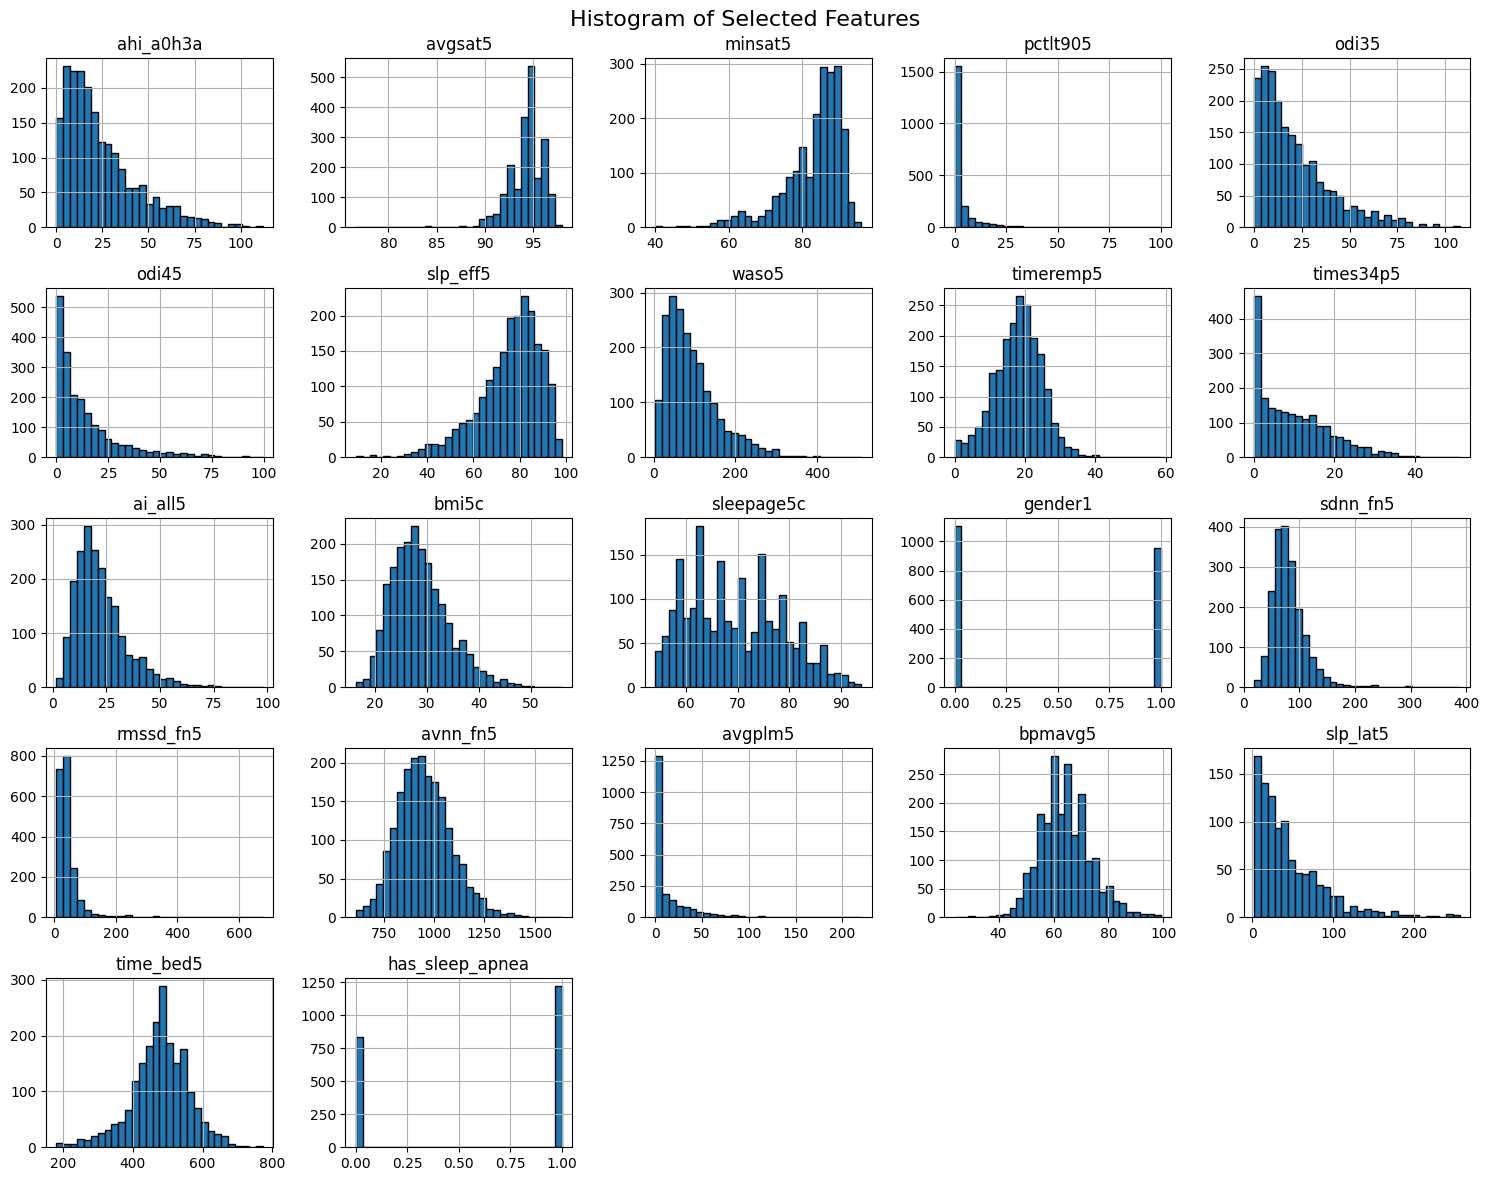

In [12]:
df_clean.hist(bins=30, figsize=(15, 12), edgecolor='black')
plt.suptitle('Histogram of Selected Features', fontsize=16)
plt.tight_layout()
plt.show()

In [24]:
missing_pct = (df_clean.isnull().sum() / len(df_clean)) * 100
print("\nMissing data percentage by column:")
for col, pct in missing_pct.sort_values(ascending=False).items():
    if pct > 0:
        print(f"{col:15}: {pct:5.1f}%")




Missing data percentage by column:
slp_lat5       :  51.1%
sdnn_fn5       :   4.2%
avnn_fn5       :   4.2%
rmssd_fn5      :   4.2%
odi35          :   1.5%
odi45          :   1.5%
timeremp5      :   1.1%
times34p5      :   1.1%
ai_all5        :   1.1%
bmi5c          :   0.2%


In [25]:
#Define final feature set 
features_to_exclude = ['slp_lat5']  # >50% missing
feature_columns = [col for col in df_clean.columns if col not in ['ahi_a0h3a', 'has_sleep_apnea'] + features_to_exclude]

print(f"\nFinal feature set ({len(feature_columns)} features):")
for i, feature in enumerate(feature_columns, 1):
    print(f"{i:2d}. {feature}")


Final feature set (19 features):
 1. avgsat5
 2. minsat5
 3. pctlt905
 4. odi35
 5. odi45
 6. slp_eff5
 7. waso5
 8. timeremp5
 9. times34p5
10. ai_all5
11. bmi5c
12. sleepage5c
13. gender1
14. sdnn_fn5
15. rmssd_fn5
16. avnn_fn5
17. avgplm5
18. bpmavg5
19. time_bed5


In [26]:
#Remove extreme outliers using IQR method
def remove_outliers(df, columns, factor=3.0):
    """Remove extreme outliers using IQR method"""
    df_clean = df.copy()
    outliers_removed = {}

    for col in columns:
        if df_clean[col].dtype in ['float64', 'int64']:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - factor * IQR
            upper_bound = Q3 + factor * IQR

            outliers = (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)
            outliers_count = outliers.sum()

            if outliers_count > 0:
                df_clean.loc[outliers, col] = np.nan
                outliers_removed[col] = outliers_count

    return df_clean, outliers_removed

# Remove outliers
df_processed, outliers_info = remove_outliers(df_clean, feature_columns)

print("Outliers converted to NaN:")
for col, count in outliers_info.items():
    print(f"{col:15}: {count:3d} outliers")


Outliers converted to NaN:
avgsat5        :   8 outliers
minsat5        :  12 outliers
pctlt905       : 166 outliers
odi35          :   4 outliers
odi45          :  33 outliers
slp_eff5       :   5 outliers
waso5          :   7 outliers
timeremp5      :   2 outliers
ai_all5        :  10 outliers
bmi5c          :   2 outliers
sdnn_fn5       :  23 outliers
rmssd_fn5      :  68 outliers
avnn_fn5       :   1 outliers
avgplm5        :  80 outliers


In [27]:
# Features and target
X = df_processed[feature_columns]
y = df_processed['has_sleep_apnea']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training class distribution: {y_train.value_counts().to_dict()}")

# Handle missing values with median imputation
imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)
X_test_imputed = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

print("Missing values handled with median imputation")


Training set shape: (1645, 19)
Test set shape: (412, 19)
Training class distribution: {1: 976, 0: 669}
Missing values handled with median imputation


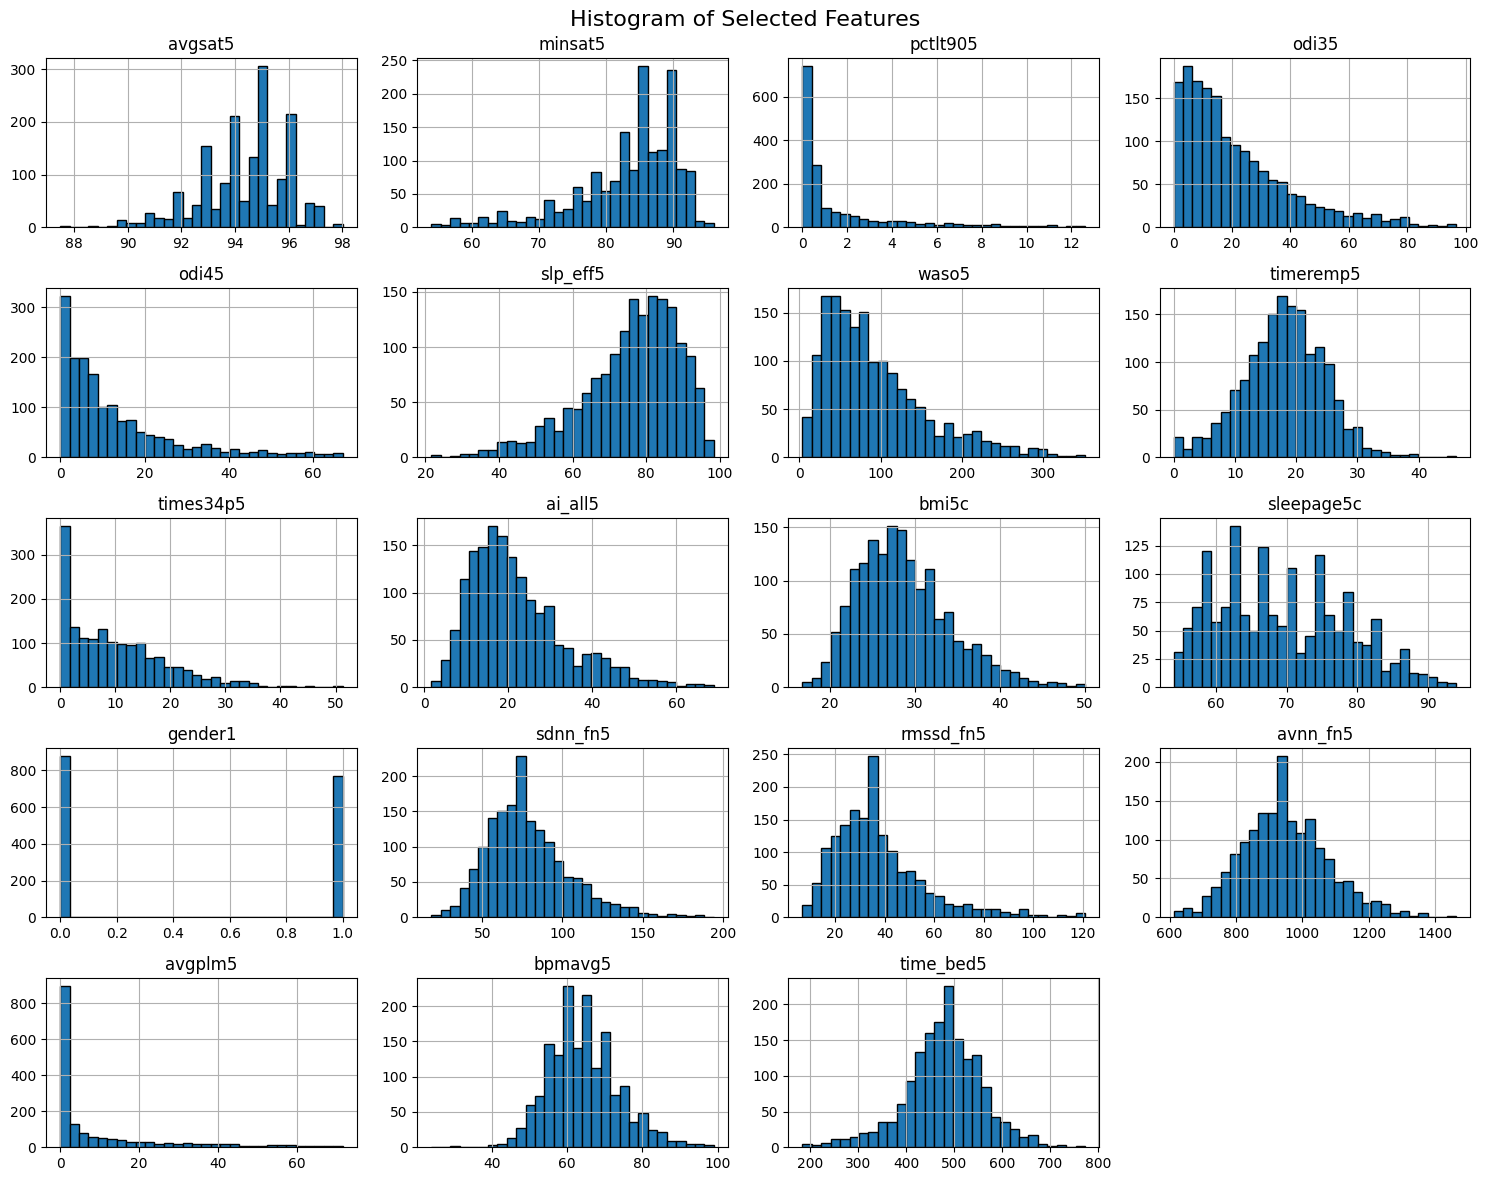

In [16]:
X_train_imputed.hist(bins=30, figsize=(15, 12), edgecolor='black')
plt.suptitle('Histogram of Selected Features', fontsize=16)
plt.tight_layout()
plt.show()


In [28]:
# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_imputed),
    columns=X_train_imputed.columns,
    index=X_train_imputed.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_imputed),
    columns=X_test_imputed.columns,
    index=X_test_imputed.index
)

print("Features scaled for Logistic Regression")


Features scaled for Logistic Regression


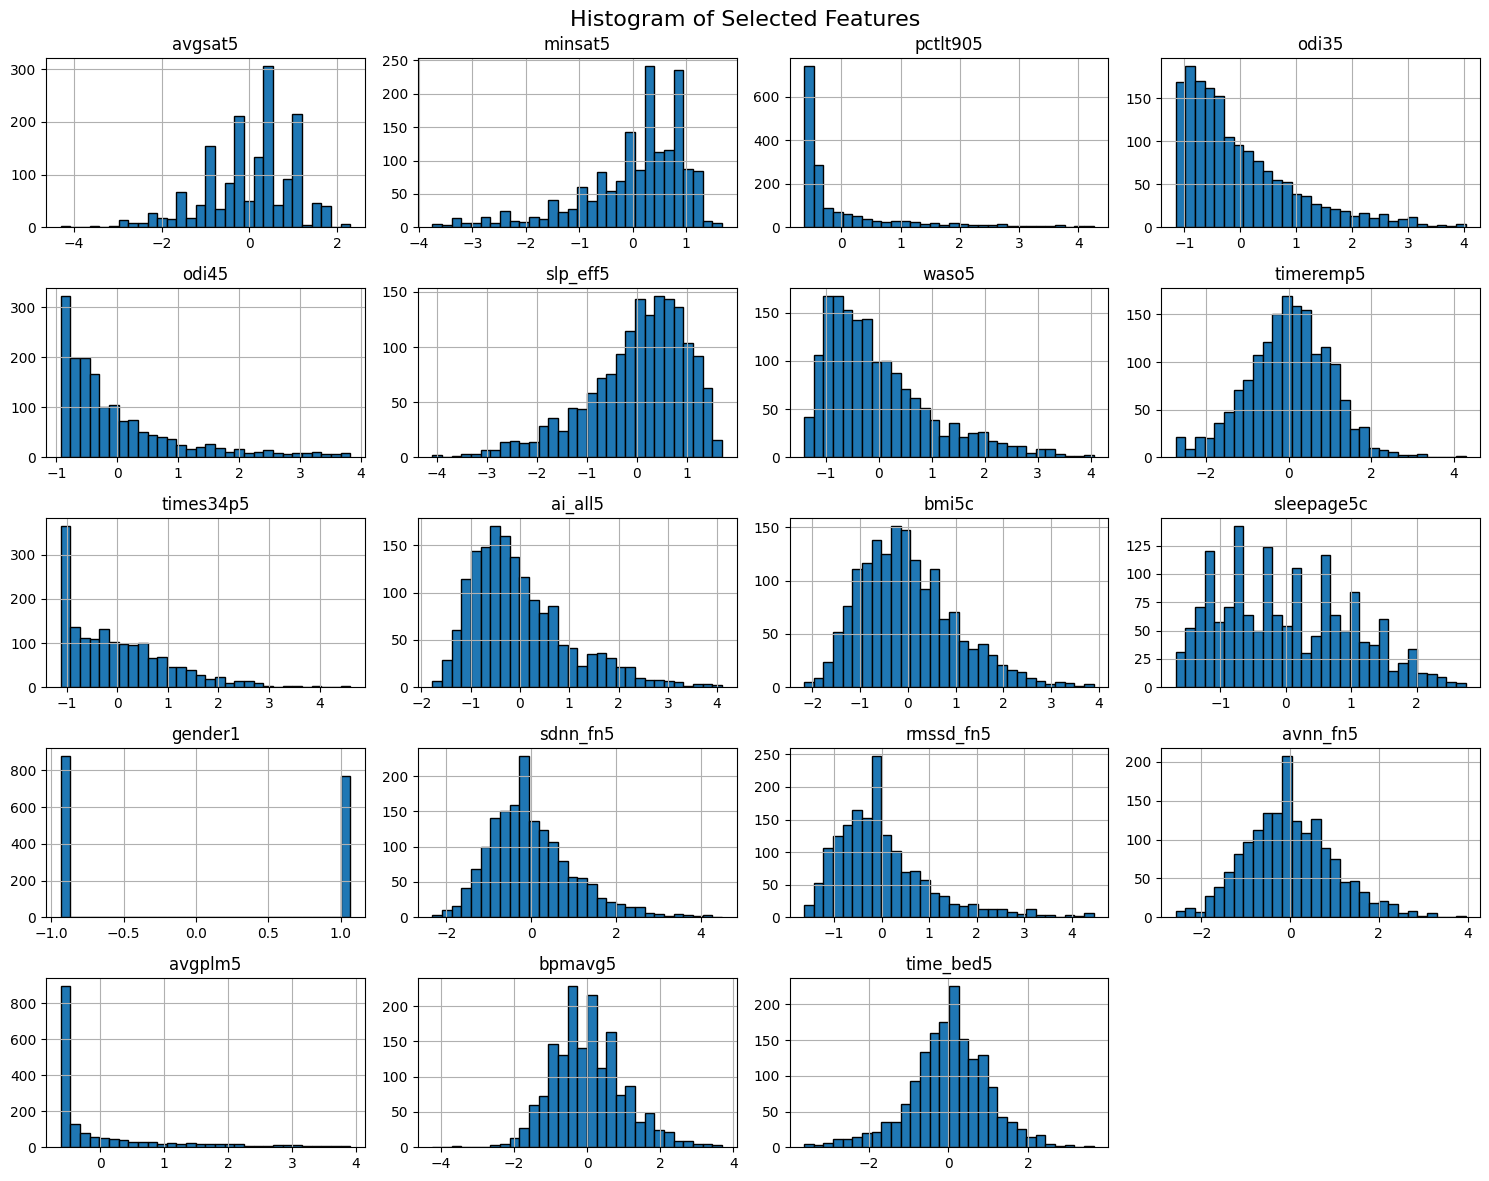

In [29]:
X_train_scaled.hist(bins=30, figsize=(15, 12), edgecolor='black')
plt.suptitle('Histogram of Selected Features', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Initialize Random Forest model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight='balanced'
)

# Train and evaluate Random Forest model
print(f"\n{'='*50}")
print("Training Random Forest")
print('='*50)

# Train model
model.fit(X_train_imputed, y_train)

# Predictions
y_pred = model.predict(X_test_imputed)
y_pred_proba = model.predict_proba(X_test_imputed)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# Cross-validation
cv_scores = cross_val_score(model, X_train_imputed, y_train, cv=5, scoring='roc_auc')

# Store results
results = {
    'Random Forest': {
        'accuracy': accuracy,
        'auc': auc,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
}

# Store trained model
trained_models = {'Random Forest': (model, X_train_imputed, X_test_imputed)}

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test AUC: {auc:.4f}")
print(f"CV AUC: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")



Training Random Forest
Test Accuracy: 0.8908
Test AUC: 0.9597
CV AUC: 0.9636 (±0.0063)


In [ ]:
# Analyze feature importance for Random Forest
def analyze_feature_importance(model, feature_names, model_name):
    """Analyze and display feature importance"""
    if hasattr(model, 'feature_importances_'):
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)

        print(f"\nTop 10 Most Important Features - {model_name}:")
        print("-" * 50)
        for _, row in importance_df.head(10).iterrows():
            print(f"{row['feature']:20}: {row['importance']:.4f}")

        return importance_df
    else:
        print(f"Feature importance not available for {model_name}")
        return None

# Step 9.2: Display feature importance for Random Forest
model, _, _ = trained_models['Random Forest']
importance_df = analyze_feature_importance(model, feature_columns, 'Random Forest')



Top 10 Most Important Features - Random Forest:
--------------------------------------------------
odi35               : 0.2487
odi45               : 0.2301
pctlt905            : 0.1114
ai_all5             : 0.1085
minsat5             : 0.0579
avgsat5             : 0.0333
bmi5c               : 0.0223
timeremp5           : 0.0213
slp_eff5            : 0.0182
waso5               : 0.0181


In [33]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

print("Performing hyperparameter tuning for Random Forest...")

# Grid search
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train_imputed, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV AUC: {grid_search.best_score_:.4f}")

# Final model with best parameters
final_model = grid_search.best_estimator_


Performing hyperparameter tuning for Random Forest...
Best parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}
Best CV AUC: 0.9651


EVALUATION OF FINAL RANDOM FOREST MODEL

1. MODEL PERFORMANCE METRICS
----------------------------------------
Accuracy:  0.8908
Precision: 0.9129
Recall:    0.9016
F1-Score:  0.9072
AUC-ROC:   0.9593

2. CONFUSION MATRIX
----------------------------------------
True Negatives:   147
False Positives:   21
False Negatives:   24
True Positives:   220

3. DETAILED CLASSIFICATION REPORT
----------------------------------------
              precision    recall  f1-score   support

     Class 0       0.86      0.88      0.87       168
     Class 1       0.91      0.90      0.91       244

    accuracy                           0.89       412
   macro avg       0.89      0.89      0.89       412
weighted avg       0.89      0.89      0.89       412



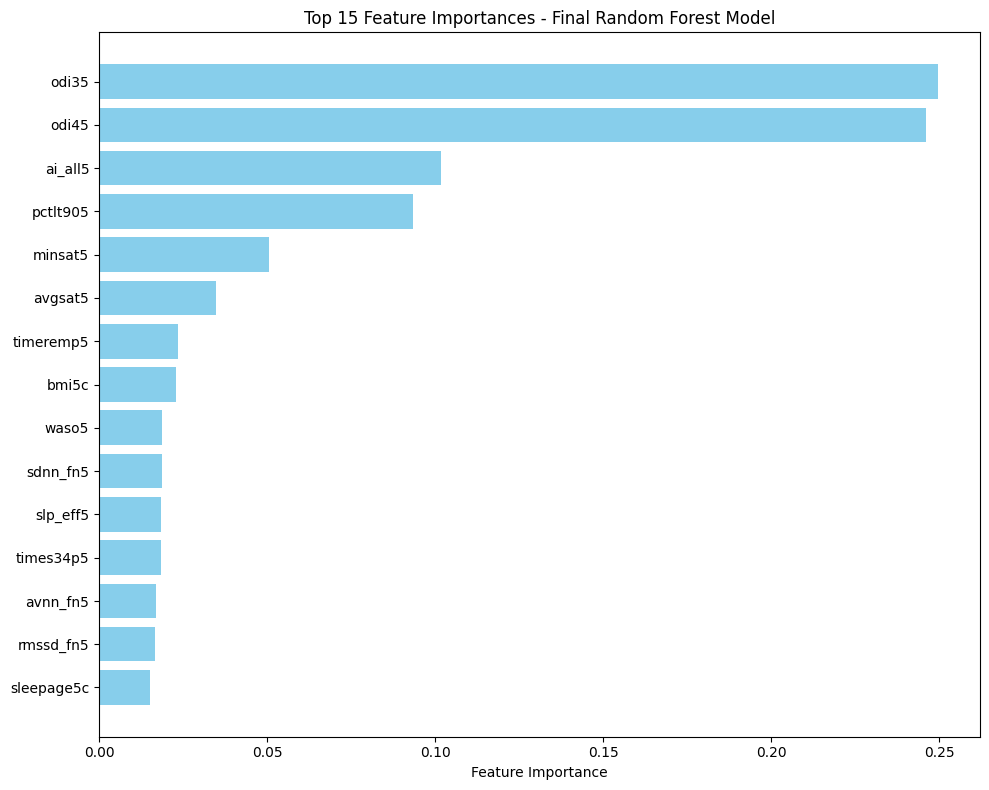


8. FINAL MODEL PARAMETERS
----------------------------------------
Optimized hyperparameters:
class_weight        : balanced
max_depth           : 15
min_samples_split   : 2
n_estimators        : 200
random_state        : 42

10. PERFORMANCE IMPROVEMENT
----------------------------------------
Comparison with initial Random Forest model:
Initial AUC:      0.9597
Final AUC:        0.9593
AUC Improvement:  -0.0004
Initial Accuracy: 0.8908
Final Accuracy:   0.8908
Accuracy Improvement: +0.0000


In [35]:
# Evaluation of Final Random Forest Model

print("="*60)
print("EVALUATION OF FINAL RANDOM FOREST MODEL")
print("="*60)

# Model Performance Metrics
print("\n1. MODEL PERFORMANCE METRICS")
print("-" * 40)

# Predictions on test set
y_pred_final = final_model.predict(X_test_imputed)
y_pred_proba_final = final_model.predict_proba(X_test_imputed)[:, 1]

# Basic metrics
accuracy_final = accuracy_score(y_test, y_pred_final)
precision_final = precision_score(y_test, y_pred_final)
recall_final = recall_score(y_test, y_pred_final)
f1_final = f1_score(y_test, y_pred_final)
auc_final = roc_auc_score(y_test, y_pred_proba_final)

print(f"Accuracy:  {accuracy_final:.4f}")
print(f"Precision: {precision_final:.4f}")
print(f"Recall:    {recall_final:.4f}")
print(f"F1-Score:  {f1_final:.4f}")
print(f"AUC-ROC:   {auc_final:.4f}")

# Confusion Matrix
print("\n2. CONFUSION MATRIX")
print("-" * 40)
cm = confusion_matrix(y_test, y_pred_final)
print(f"True Negatives:  {cm[0,0]:4d}")
print(f"False Positives: {cm[0,1]:4d}")
print(f"False Negatives: {cm[1,0]:4d}")
print(f"True Positives:  {cm[1,1]:4d}")



# Classification Report
print("\n3. DETAILED CLASSIFICATION REPORT")
print("-" * 40)
print(classification_report(y_test, y_pred_final, target_names=['Class 0', 'Class 1']))


#Feature importances
feature_importance_final = pd.DataFrame({
    'feature': X_train_imputed.columns,
    'importance': final_model.feature_importances_
})


feature_importance_final = feature_importance_final.sort_values(by='importance', ascending=False)


# Visualize feature importance
plt.figure(figsize=(10, 8))
top_features = feature_importance_final.head(15)
plt.barh(range(len(top_features)), top_features['importance'], color='skyblue')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances - Final Random Forest Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Model Parameters
print("\n8. FINAL MODEL PARAMETERS")
print("-" * 40)
print("Optimized hyperparameters:")
for param, value in final_model.get_params().items():
    if param in ['n_estimators', 'max_depth', 'min_samples_split', 'random_state', 'class_weight']:
        print(f"{param:20}: {value}")


# Performance Comparison
print("\n10. PERFORMANCE IMPROVEMENT")
print("-" * 40)
print("Comparison with initial Random Forest model:")
initial_auc = results['Random Forest']['auc']
initial_accuracy = results['Random Forest']['accuracy']

print(f"Initial AUC:      {initial_auc:.4f}")
print(f"Final AUC:        {auc_final:.4f}")
print(f"AUC Improvement:  {auc_final - initial_auc:+.4f}")
print(f"Initial Accuracy: {initial_accuracy:.4f}")
print(f"Final Accuracy:   {accuracy_final:.4f}")
print(f"Accuracy Improvement: {accuracy_final - initial_accuracy:+.4f}")


